In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## Ex 8

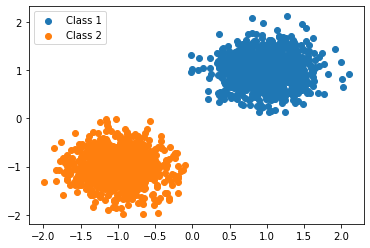

In [2]:
import statsmodels as sm

n1 = 1000
n2 = 1000

m1 = np.array([1,1])
m2 = np.array([-1,-1])
cov = 0.1 * np.identity(len(m1))
X1 = np.random.multivariate_normal(m1, cov, n1)
X2 = np.random.multivariate_normal(m2, cov, n2)

plt.scatter(X1[:,0], X1[:,1], label='Class 1')
plt.scatter(X2[:,0], X2[:,1], label='Class 2')
plt.legend()

In [3]:
X = np.concatenate((X1, X2))
y = np.concatenate((np.repeat(0, n1), np.repeat(1,n2)))

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)


In [5]:
lsvc = LinearSVC()
lsvc.fit(X_scaled, y_train)

LinearSVC()

In [6]:
lsvc.coef_

array([[-1.00446932, -1.1186506 ]])

In [7]:
lsvc.intercept_

array([-0.05836515])

In [8]:
sgdc = SGDClassifier()
sgdc.fit(X_scaled, y_train)
sgdc.coef_

array([[-1.68442832, -2.21673017]])

In [9]:
sgdc.intercept_

array([0.05423133])

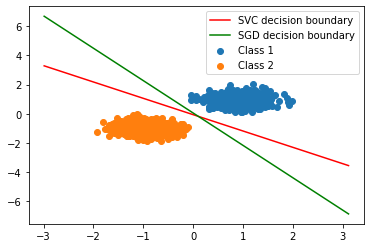

In [10]:
xmin = min(X[:,0]) - 1 
xmax = max(X[:,1]) + 1

xx = np.linspace(xmin, xmax)
ySVC = lsvc.intercept_ + lsvc.coef_[0][1]*xx
ySGD = sgdc.intercept_ + sgdc.coef_[0][1]*xx

plt.scatter(X_scaled[y_train==0,0], X_scaled[y_train==0,1], label='Class 1')
plt.scatter(X_scaled[y_train==1,0], X_scaled[y_train==1,1], label='Class 2')
plt.plot(xx, ySVC, 'r', label = 'SVC decision boundary')
plt.plot(xx, ySGD,'g', label = 'SGD decision boundary')
plt.legend()

## Ex - 9

In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X,y = mnist['data'], mnist['target']

In [12]:
y =  y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(), X_train.to_numpy(), y_train, cv=5)

KeyboardInterrupt: 

In [42]:
from sklearn.model_selection import GridSearchCV

params = {
    'kernel' : ['poly', 'rbf', 'sigmoid'],
    'C' : [0.01,0.1,1,10,100],
    'gamma' : ['scale', 'auto']
}
    

gs = GridSearchCV(SVC(), params,  scoring='accuracy', n_jobs=4)

In [43]:
gs.fit(X_train.to_numpy(), y_train)

GridSearchCV(estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [44]:
gs.cv_results_

{'mean_fit_time': array([ 2244.63572202,  2263.45910544,  2475.32496529,   298.86032124,
        36893.18469253,  5525.79093256,   994.55073767,   844.72004333,
         1426.00438495,   446.80097318, 10875.54266567,  5394.2269547 ,
          382.68241343,   355.8230351 ,   566.00430193,   276.69292073,
        36405.91328626,  5848.92060351,   281.25162268,   427.014258  ,
          512.76614962,   289.77929034, 32684.6757205 , 38355.3520453 ,
          283.8097578 ,   354.43327808,   481.14856114,   283.38562713,
        27176.01912103, 27764.05599284]),
 'std_fit_time': array([4.25321135e+01, 6.35369523e+01, 1.84298813e+02, 3.42830681e+01,
        1.41871430e+04, 1.44666124e+02, 1.48468519e+02, 4.11967550e+01,
        3.48112700e+02, 1.52780084e+02, 2.38764612e+02, 3.52395068e+02,
        3.52296532e+00, 1.73303747e+01, 2.04248879e+01, 1.14317094e+01,
        1.18497342e+04, 1.62262509e+02, 1.01903892e+01, 3.17571386e+01,
        4.99246733e+01, 9.22935570e+00, 2.23503668e+04, 2.698

In [45]:
gs.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [46]:
from sklearn.model_selection import cross_val_predict

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(gs.best_estimator_, X_train.to_numpy(), y_train, scoring='accuracy', n_jobs=-1)

array([0.98466667, 0.98283333, 0.97958333, 0.97883333, 0.98375   ])